In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import random
from sklearn.linear_model import LinearRegression

# 1. Linear regression with 1-dimensional input

## 1-1. Making an artificial dataset

In [173]:
x = [i for i in range(50)]

In [174]:
y = [2 * j + random.normalvariate(0,10) for j in range(50)]

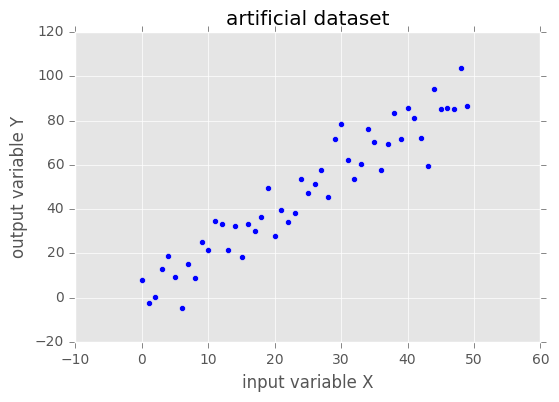

In [175]:
plt.scatter(x,y)
plt.xlabel('input variable X')
plt.ylabel('output variable Y')
plt.title('artificial dataset')
plt.show()

## 1-2. Linear regression from scratch

In [176]:
def mean(values):
    return sum(values) / len(values)

In [177]:
def beta(x, y):
    # Calculate beta_1
    covariance = 0
    variance_x = 0
    num_points = len(x)
    for i in range(num_points):
        covariance += (x[i] - mean(x)) * (y[i] - mean(y))
        variance_x += pow(x[i] - mean(x), 2)
    # covariance = covariance / num_points
    # variance_x = variance_x / num_points
    beta_1 = covariance / variance_x
    
    # Calculate beta_0
    beta_0 = mean(y) - beta_1 * mean(x)
    
    return [beta_0, beta_1]

In [178]:
beta_v1 = beta(x, y)
print(beta_v1)

[2.0860198076474106, 1.8678130918779239]


## 1-3. Linear regression using numpy

In [179]:
beta_1 = np.cov(x, y, ddof = 0)[0,1] / np.var(x)
beta_0 = np.mean(y) - beta_1 * np.mean(x)
beta_v2 = [beta_0, beta_1]
print(beta_v2)

[2.0860198076474106, 1.8678130918779239]


## 1-4. Linear regression using scikit-learn

In [180]:
train_x = np.array(x)
train_y = np.array(y)

In [181]:
# What happened?
model = LinearRegression()
model.fit(train_x, train_y)
print(model.coef_)
print(model.intercept_)

/Users/kth/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 50]

In [182]:
model = LinearRegression()
model.fit(train_x.reshape(-1, 1), train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [183]:
beta_v3 = [model.intercept_, model.coef_[0]]
print(beta_v3)

[2.0860198076474177, 1.8678130918779237]


## 1-5. Compare results and visualize the regression line

In [184]:
print('LR_v1:\t', beta_v1)
print('LR_v2:\t', beta_v2)
print('LR_v3:\t', beta_v3)

LR_v1:	 [2.0860198076474106, 1.8678130918779239]
LR_v2:	 [2.0860198076474106, 1.8678130918779239]
LR_v3:	 [2.0860198076474177, 1.8678130918779237]


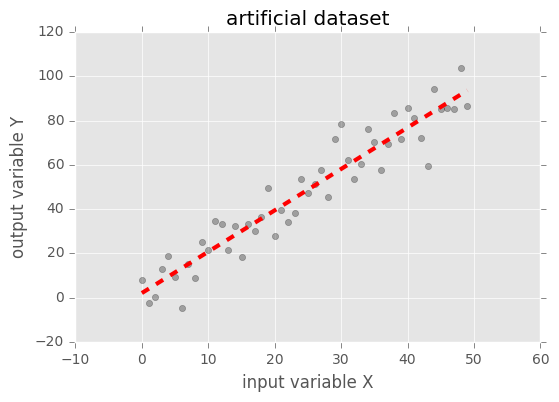

In [185]:
plt.scatter(train_x, train_y, color = 'black', alpha = 0.3)
plt.xlabel('input variable X')
plt.ylabel('output variable Y')
plt.title('artificial dataset')
plt.plot(train_x, model.predict(train_x.reshape(-1, 1)), color = 'red', linewidth=3, linestyle = '--')
plt.show()

# 2. Linear regression with 2-dimensional input

## 2-1. Loading the "advertising" dataset
- Advertising dataset from **"An Introduction to Statistical Learning"**
- http://www-bcf.usc.edu/~gareth/ISL/

In [186]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [187]:
data.head(5)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [188]:
data.shape

(200, 4)

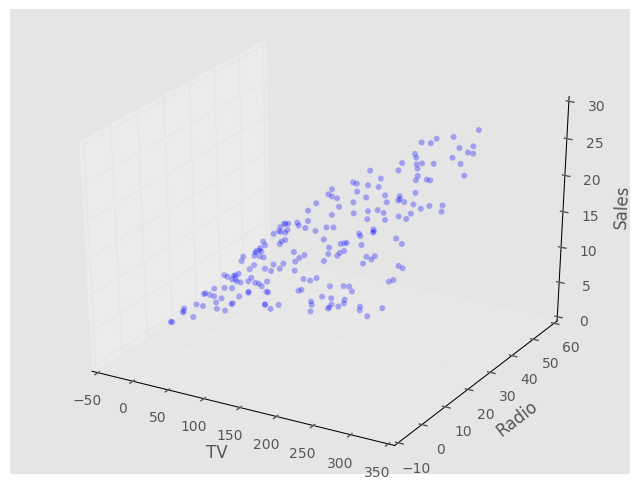

In [189]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['TV'], data['Radio'], data['Sales'], c='b', marker='o', alpha = 0.3)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()

## 2-2. Linear regression using numpy

In [190]:
X = data[['TV', 'Radio']]
y = data['Sales']

In [191]:
# Converting dataframe to array
X = X.values
y = y.values

In [192]:
# X의 첫 번째 열에 모든 값이 1인 array를 넣기
X = np.c_[np.ones(len(X)), X]

In [193]:
beta_v1 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print(beta_v1)

[ 2.92109991  0.04575482  0.18799423]


## 2-3. Linear regression using scikit-learn

In [194]:
X = data[['TV', 'Radio']]
y = data['Sales']

In [195]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [196]:
beta_v2 = model.coef_
beta_v2 = np.insert(beta_v2, 0, model.intercept_)
print(beta_v2)

[ 2.92109991  0.04575482  0.18799423]


## 2-4. Compare results and visualize the regression plane

In [197]:
print('LR_v1:\t', beta_v1)
print('LR_v2:\t', beta_v2)

LR_v1:	 [ 2.92109991  0.04575482  0.18799423]
LR_v2:	 [ 2.92109991  0.04575482  0.18799423]


In [198]:
X = data[['TV', 'Radio']].values
y = data['Sales'].values
y_hat = model.predict(X)

(array([ 23.,  61.,  62.,  24.,  19.,   7.,   2.,   1.,   0.,   1.]),
 array([-2.83283683, -1.66978318, -0.50672953,  0.65632411,  1.81937776,
         2.98243141,  4.14548506,  5.30853871,  6.47159236,  7.63464601,
         8.79769966]),
 <a list of 10 Patch objects>)

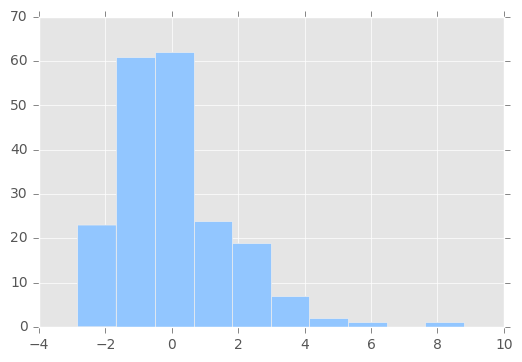

In [199]:
error = y_hat - y
plt.hist(error)

In [200]:
# error의 절대값이 3 이상인 데이터포인트 인덱스에 True 넣기
index = np.where(np.abs(error) >= 3, True, False)

In [201]:
index

array([False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,

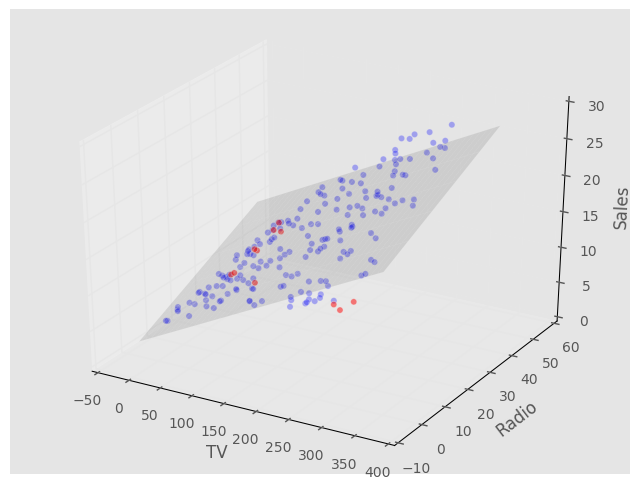

In [202]:
plt.style.use('seaborn-pastel')

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection='3d')

# Error의 절대값이 3이 넘지 않는 데이터포인트는 파란색('b'), 그렇지 않은 포인트는 빨간색('r')로 표시
ax.scatter(X[~index,0], X[~index,1], y[~index], c='b', marker='o', alpha = 0.3)
ax.scatter(X[index,0], X[index,1], y[index], c='r', marker='o', alpha = 0.5)

# Regression plane를 x1와 x2에 대한 함수로 정의
plane = lambda x1, x2: beta_v2[0] + beta_v2[1] * x1 + beta_v2[2] * x2 

# Regression plane의 영역을 (대충) 정의한 코드
grid_x1, grid_x2 = np.mgrid[-30:350, 0:50]
ax.plot_surface(grid_x1, grid_x2, plane(grid_x1, grid_x2), color = 'k', alpha = 0.1)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()

## 2-5. Test

In [217]:
X = data[['TV', 'Radio']]
y = data['Sales']

# Converting dataframe to array
X = X.values
y = y.values

# X의 첫 번째 열에 모든 값이 1인 array를 넣기
# X의 마지막 열에 'TV' 변수값의 2배인 열을 추가
X = np.c_[np.ones(len(X)), X, 2 * X[:,0]]

In [218]:
X[0:5,]

array([[   1. ,  230.1,   37.8,  460.2],
       [   1. ,   44.5,   39.3,   89. ],
       [   1. ,   17.2,   45.9,   34.4],
       [   1. ,  151.5,   41.3,  303. ],
       [   1. ,  180.8,   10.8,  361.6]])

In [219]:
# What happened?
beta_v3 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print(beta_v3)

LinAlgError: Singular matrix

In [213]:
np.corrcoef(X[:,1], X[:,3])

array([[ 1.        ,  0.96890473],
       [ 0.96890473,  1.        ]])

In [214]:
X = X[:,[1,2,3]]

In [215]:
model = LinearRegression()
model.fit(X, y)
beta_v4 = model.coef_
beta_v4 = np.insert(beta_v4, 0, model.intercept_)
print(beta_v4)
print(beta_v2)

[ 2.92109991 -0.04788694  0.04753159  0.04682088]
[ 2.92109991  0.04575482  0.18799423]


In [216]:
X[0:5,]

array([[ 230.1,   37.8,  573.6],
       [  44.5,   39.3,  206.9],
       [  17.2,   45.9,  172.1],
       [ 151.5,   41.3,  426.9],
       [ 180.8,   10.8,  394. ]])